In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv('/content/risk_factors_cervical_cancer.csv')

In [ ]:
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [ ]:
df = df.rename(columns={"Citology": "Cytology"})

In [ ]:
df = df.replace('?',-1)

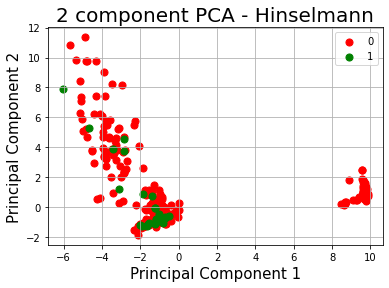

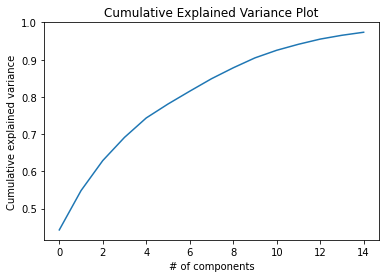

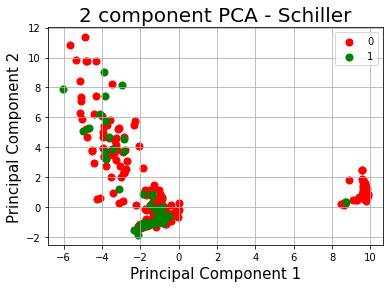

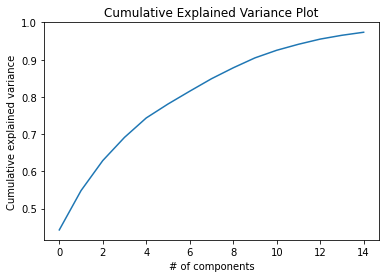

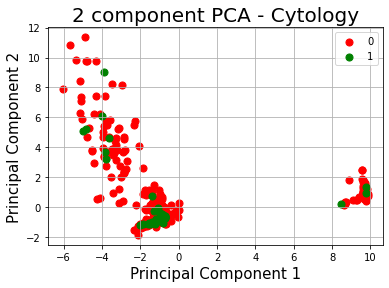

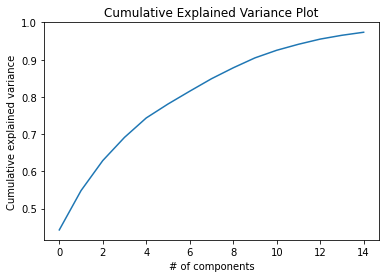

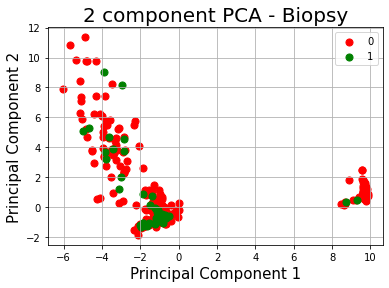

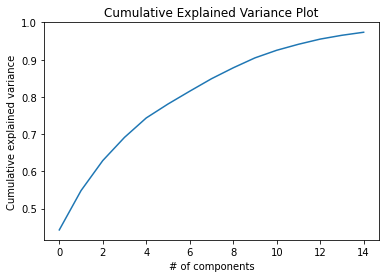

In [ ]:
target_columns = df.columns[-4:].tolist()
features = df.columns[:-5].tolist()

for target_column in target_columns:

    # Separating out the features
    x = df.loc[:, features].values
    # Separating out the target
    y = df.loc[:,[target_column]].values
    # Standardizing the features
    x = StandardScaler().fit_transform(x)

    n=15
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents
                , columns = ['principal component ' + str(i) for i in range(1,n+1)])
    
    finalDf = pd.concat([principalDf, df[[target_column]]], axis = 1)

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA - ' + target_column, fontsize = 20)
    targets = [0,1]
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf[target_column] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                , finalDf.loc[indicesToKeep, 'principal component 2']
                , c = color
                , s = 50)
    ax.legend(targets)
    ax.grid()

    plt.show()
    plt.title("Cumulative Explained Variance Plot")
    plt.xlabel("# of components")
    plt.ylabel("Cumulative explained variance")
    plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
X = df[features].values
outputs = df[target_columns]

In [ ]:
outputs

,Hinselmann,Schiller,Cytology,Biopsy
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
853,0,0,0,0
854,0,0,0,0
855,0,0,1,0
856,0,0,0,0


[95.93023256 95.93023256 95.93023256 94.73684211 95.90643275] Mean: 95.68679450564396 std: 0.4750656327160205
[91.27906977 91.27906977 91.27906977 90.64327485 87.71929825] Mean: 90.43995648034816 std: 1.3824364663116913
[94.76744186 94.76744186 94.76744186 95.32163743 94.73684211] Mean: 94.87216102271182 std: 0.22505046374841978
[93.60465116 93.60465116 93.60465116 93.56725146 93.56725146] Mean: 93.58969128246974 std: 0.018322036699732865


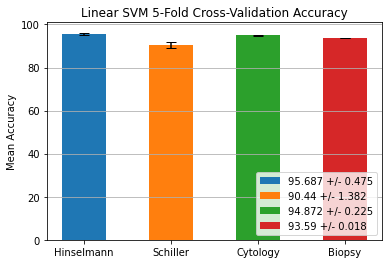

In [ ]:
for target_column in target_columns:
    
    y = outputs[target_column].values
    
    clf = svm.SVC(kernel='linear', C=1)
    scores = cross_val_score(clf, X, y, cv=5)
    scores *= 100
    print(scores, 'Mean: ' + str(scores.mean()), 'std: ' + str(scores.std()))
    plt.bar([target_columns.index(target_column)],scores.mean(), label='' + str(round(scores.mean(),3)) + ' +/- ' + str(round(scores.std(),3)), yerr=scores.std(), capsize=5, width=0.5)

plt.xticks([i for i in range(len(target_columns))],target_columns)
plt.grid(axis='y')
plt.title("Linear SVM 5-Fold Cross-Validation Accuracy")
plt.ylabel('Mean Accuracy')
plt.legend(loc='lower right')
lol = plt.show()

[95.93023256 95.34883721 95.93023256 94.73684211 95.32163743] Mean: 95.45355637154903 std: 0.4464276927166263
[88.37209302 90.69767442 91.27906977 91.22807018 88.88888889] Mean: 90.09315925472595 std: 1.2224713667503504
[93.60465116 94.76744186 94.76744186 95.32163743 94.73684211] Mean: 94.63960288317692 std: 0.5618607046061951
[91.27906977 93.60465116 93.60465116 93.56725146 91.8128655 ] Mean: 92.77369781041752 std: 1.0166421264901644


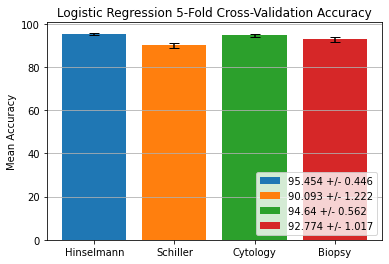

In [ ]:
for target_column in target_columns:
    
    y = outputs[target_column].values
    
    clf = LogisticRegression(max_iter=400)
    scores = cross_val_score(clf, X, y, cv=5)
    scores *= 100
    print(scores, 'Mean: ' + str(scores.mean()), 'std: ' + str(scores.std()))
    plt.bar([target_columns.index(target_column)],scores.mean(), label='' + str(round(scores.mean(),3)) + ' +/- ' + str(round(scores.std(),3)), yerr=scores.std(), capsize=5)

plt.xticks([i for i in range(len(target_columns))],target_columns)
plt.grid(axis='y')
plt.title("Logistic Regression 5-Fold Cross-Validation Accuracy")
plt.ylabel('Mean Accuracy')
plt.legend(loc='lower right')
plt.show()

[95.93023256 95.93023256 95.93023256 95.90643275 95.90643275] Mean: 95.92071263429892 std: 0.011659477899826841
[91.27906977 91.27906977 91.27906977 91.8128655  91.22807018] Mean: 91.37562899496803 std: 0.21950873206226054
[94.76744186 94.76744186 94.76744186 95.32163743 94.73684211] Mean: 94.87216102271182 std: 0.22505046374841978
[93.60465116 93.60465116 93.60465116 93.56725146 93.56725146] Mean: 93.58969128246974 std: 0.018322036699732865


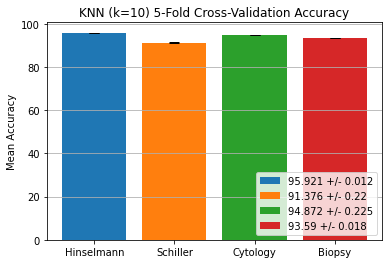

In [ ]:
for target_column in target_columns:
    
    y = outputs[target_column].values
    
    clf = KNeighborsClassifier(n_neighbors=10)
    scores = cross_val_score(clf, X, y, cv=5)
    scores *= 100
    print(scores, 'Mean: ' + str(scores.mean()), 'std: ' + str(scores.std()))
    plt.bar([target_columns.index(target_column)],scores.mean(), label='' + str(round(scores.mean(),3)) + ' +/- ' + str(round(scores.std(),3)), yerr=scores.std(), capsize=5)

plt.xticks([i for i in range(len(target_columns))],target_columns)
plt.grid(axis='y')
plt.title("KNN (k=10) 5-Fold Cross-Validation Accuracy")
plt.ylabel('Mean Accuracy')
plt.legend(loc='lower right')
plt.show()